<a href="https://colab.research.google.com/github/Belal-Darwish9/DeepLearning_project/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks**

**This notebook includes codes on convolutional neural networks for multi-class classification.**

# **Importing the libraries.**



In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [65]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random
import zipfile
import os
import keras_tuner as kt
from tensorflow.keras.utils import plot_model
import shutil
import seaborn as sns

# **Download the dataset.**

In [3]:
listdata = tfds.list_builders()
print(f'{ "cifar10" in listdata}')

True


In [4]:
(train_data, test_data), ds_info = tfds.load(name = 'cifar10',
                                             split = ['train', 'test'],
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.DCD3I7_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.DCD3I7_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


### **Metadata about dataset.**

In [5]:
class_names = ds_info.features['label'].names
print(f'The number of classes are: {len(class_names)}')
print(f'The class names are: {class_names}')

The number of classes are: 10
The class names are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### **Infornation about the image in dataset.**

In [6]:
train_sample = train_data.take(1)
test_sample = test_data.take(1)

In [7]:
for image, label in train_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from cifar10 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  max value : {tf.reduce_min(image)}
  max value : {tf.reduce_max(image)}
        """)


  Image shape: (32, 32, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from cifar10 (tensor form): 7
  Class name (str form): horse
  max value : 0
  max value : 249
        


In [8]:
for image, label in test_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from cifar10 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  max value : {tf.reduce_min(image)}
  max value : {tf.reduce_max(image)}
        """)


  Image shape: (32, 32, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from cifar10 (tensor form): 7
  Class name (str form): horse
  max value : 5
  max value : 255
        


### **Plot an image from TensorFlow Datasets.**

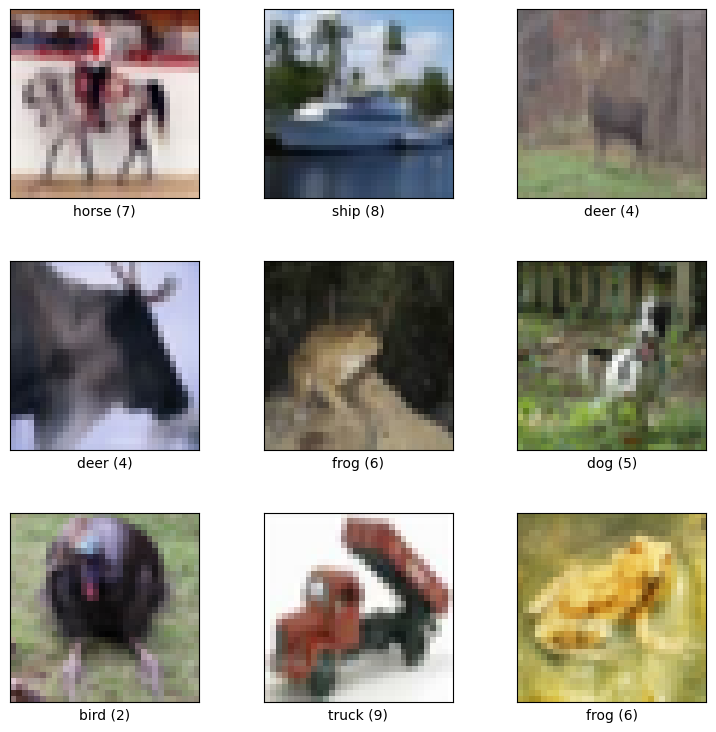

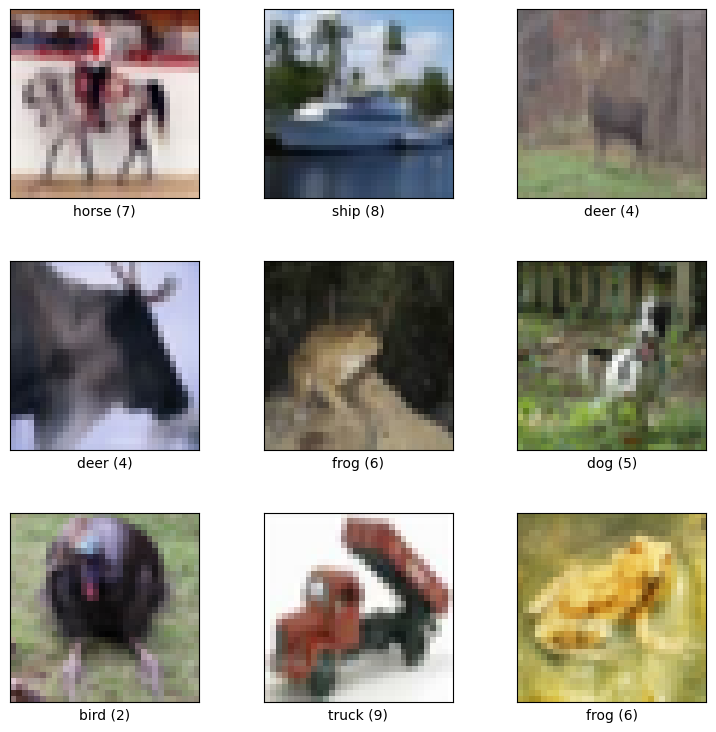

In [9]:
tfds.visualization.show_examples(train_data,
                                 ds_info= ds_info)

# **Data preprocessing.**

**All images in the dataset have *the data type is not float. You need pre-processing to adjust them.**


**Create a preprocessing function to convert data type.**

In [10]:
def preprocess(image, label):
  return tf.cast(image, tf.float32), label

In [11]:
train_data = train_data.map(map_func=preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data = test_data.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [12]:
print(f'The image before preprocessing.\n {image}\n')
print(f'The image after preprocessing.\n {preprocess(image, label)}')

The image before preprocessing.
 [[[180 186 189]
  [161 167 168]
  [140 146 142]
  ...
  [ 52  55  40]
  [ 51  55  40]
  [ 51  54  40]]

 [[172 178 176]
  [150 156 153]
  [118 125 118]
  ...
  [ 45  47  33]
  [ 43  45  31]
  [ 44  48  34]]

 [[161 168 160]
  [147 155 146]
  [120 127 118]
  ...
  [ 42  48  33]
  [ 43  50  34]
  [ 46  56  39]]

 ...

 [[249 249 249]
  [253 253 253]
  [252 252 252]
  ...
  [254 254 254]
  [255 255 255]
  [251 251 251]]

 [[249 249 249]
  [253 253 253]
  [252 252 252]
  ...
  [254 254 254]
  [255 255 255]
  [252 252 252]]

 [[249 249 249]
  [253 253 253]
  [252 252 252]
  ...
  [254 254 254]
  [255 255 255]
  [250 250 250]]]

The image after preprocessing.
 (<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[180., 186., 189.],
        [161., 167., 168.],
        [140., 146., 142.],
        ...,
        [ 52.,  55.,  40.],
        [ 51.,  55.,  40.],
        [ 51.,  54.,  40.]],

       [[172., 178., 176.],
        [150., 156., 153.],
        [11

In [13]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# **Build model callbacks.**

**This callbacks is used when the model starts training. To improve the performance of your model.**

In [14]:
Filepath = 'content/best_model.keras'
Model_CheckPoint = tf.keras.callbacks.ModelCheckpoint(filepath=Filepath,
                                                      monitor='val_accuracy',
                                                      save_best_only=True,
                                                      mode = 'max')

Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  restore_best_weights=True,
                                                  mode = 'min')

Reduce_Learningrate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                           factor=0.2,
                                                           patience=5,
                                                           mode = 'min')

# **Build a CNN model.**

In [15]:
CNN_model = tf.keras.Sequential()
CNN_model.add(tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3), name = 'Normalization_Layer'))
CNN_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name = 'Conv2D_Layer_1'))
CNN_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name = 'Conv2D_Layer_2'))
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid', name = 'MaxPool2D_Layer_1'))
CNN_model.add(tf.keras.layers.Dropout(rate=0.2, name = 'Dropout_Layer_1'))
CNN_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name = 'Conv2D_Layer_3'))
CNN_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name = 'Conv2D_Layer_4'))
CNN_model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid', name = 'MaxPool2D_Layer_2'))
CNN_model.add(tf.keras.layers.Dropout(rate=0.2, name = 'Dropout_Layer_2'))
CNN_model.add(tf.keras.layers.Flatten(name = 'Flatten_Layer'))
CNN_model.add(tf.keras.layers.Dense(units=100, activation='relu', name = 'Dense_Layer_1'))
CNN_model.add(tf.keras.layers.Dense(units=len(class_names), activation='softmax', name = 'output_Dense_Layer_2'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Compiling a CNN model.**

In [16]:
CNN_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

### **CNN model summary.**

In [17]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Normalization_Layer (Rescaling)      │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_1 (Conv2D)              │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_2 (Conv2D)              │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_1 (MaxPooling2D)     │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_3 (Conv2D)              │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_4 (Conv2D)              │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_2 (MaxPooling2D)     │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_1 (Dense)                │ (None, 100)                 │          80,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_Dense_Layer_2 (Dense)         │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,750 (428.71 KB)

 Trainable params: 109,750 (428.71 KB)

 Non-trainable params: 0 (0.00 B)

### **Plot model.**

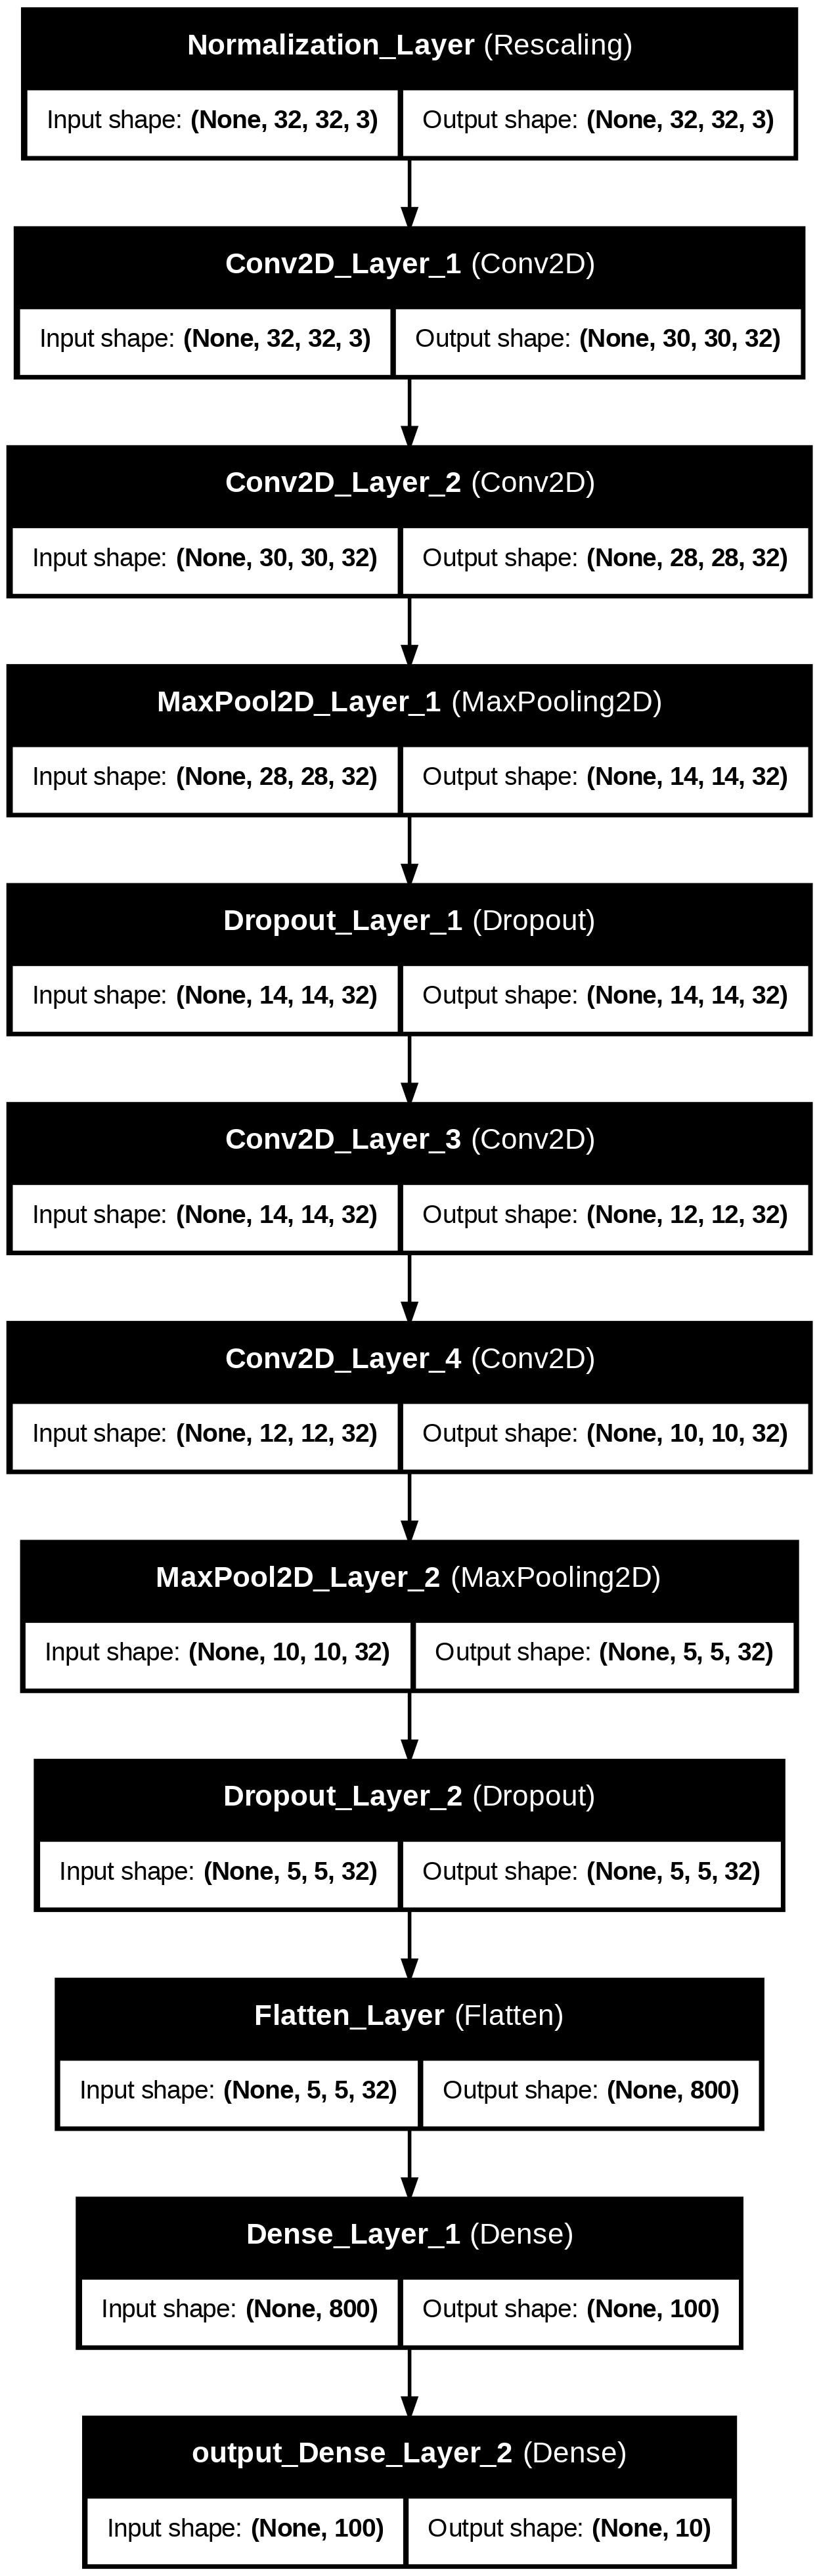

In [ ]:
plot_model(CNN_model, show_shapes=True, show_layer_names=True)

### **CNN model training.**

In [18]:
Epochs = 10
CNN_model_history = CNN_model.fit(train_data,
                                   epochs=Epochs,
                                   validation_data = test_data,
                                   validation_steps=int(0.20 * len(test_data)),
                                   callbacks=[Model_CheckPoint, Early_Stopping, Reduce_Learningrate])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3526 - loss: 1.7549 - val_accuracy: 0.5534 - val_loss: 1.2232 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5634 - loss: 1.2239 - val_accuracy: 0.6275 - val_loss: 1.0485 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6279 - loss: 1.0461 - val_accuracy: 0.6492 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6645 - loss: 0.9549 - val_accuracy: 0.6789 - val_loss: 0.9140 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6854 - loss: 0.8877 - val_accuracy: 0.7016 - val_loss: 0.8262 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7065 - loss: 0.8389 - val_accuracy: 0.7500 - val_loss: 0.9942 - learning_rate: 0.0010
Epoch 7/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7198 - loss: 0.7941 - val_accuracy: 0.7253 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7337 - loss: 0.7585 - val_accuracy: 0.7329 - val_loss: 0.7930 - learning_rate: 0.0010
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7426 - loss: 0.7286 - val_accuracy: 0.7394 - val_loss: 0.7754 - learning_rate: 0.0010
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7476 - loss: 0.7117 - val_accuracy: 0.7379 - val_loss: 0.7938 - learning_rate: 0.0010


### **plot loss and accuracy curves.**

In [19]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

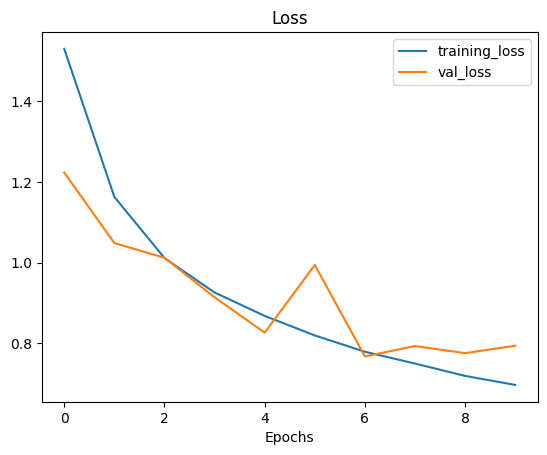

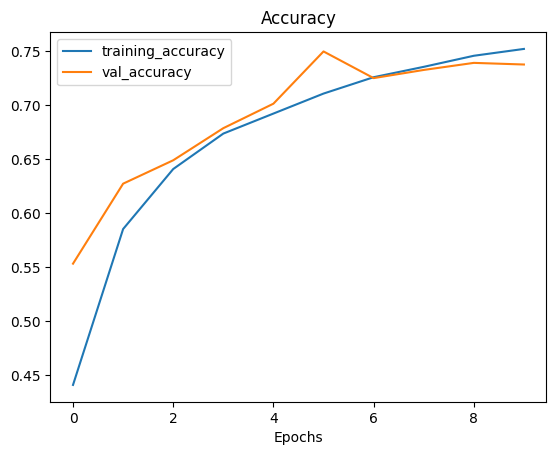

In [20]:
plot_loss_curves(CNN_model_history)

### **Perform prediction and evaluation of our model.**


In [21]:
Prediction = CNN_model.predict(test_data)
Loss, Accuracy = CNN_model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7241 - loss: 0.7859


In [22]:
print(f"Model loss on test set: {(Loss):.2f}%")
print(f"Model accuracy on test set: {(Accuracy*100):.0f}%")

Model loss on test set: 0.80%
Model accuracy on test set: 72%


### **Compare predicted values ​to actual values.**

In [23]:
predicted_classes = np.argmax(Prediction, axis=1)
predicted_classes

array([2, 0, 6, ..., 8, 6, 0])

In [24]:
label = []
for _, labels in test_data:
  label.append(labels)
label = np.concatenate(label)
label

array([7, 0, 6, ..., 8, 6, 0])

In [25]:
result = predicted_classes == label
num_true = 0
num_false = 0
for i in result:
  if i == True:
    num_true += 1
  else:
    num_false += 1

In [26]:
print(f"Number of total label {len(label)}")
print(f"Number of true predictions: {num_true}")
print(f"Number of false predictions: {num_false}")

Number of total label 10000
Number of true predictions: 7234
Number of false predictions: 2766


**Rebuild the same model but with some *data augmentation layers* to improve accuracy.**




# **Build a CNN model with data augmentation layers.**

In [27]:
CNN_augmentation_model = tf.keras.Sequential()
CNN_augmentation_model.add(tf.keras.layers.RandomFlip("horizontal", input_shape=(32, 32, 3), name='RandomFlip_Layer'))
CNN_augmentation_model.add(tf.keras.layers.RandomRotation(0.1, name='RandomRotation_Layer'))
CNN_augmentation_model.add(tf.keras.layers.RandomZoom(0.2, name='RandomZoom_Layer'))
CNN_augmentation_model.add(tf.keras.layers.RandomTranslation(0.1, 0.1, name='RandomTranslation_Layer'))
CNN_augmentation_model.add(tf.keras.layers.Rescaling(1./255, name='Normalization_Layer'))
CNN_augmentation_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_Layer_1'))
CNN_augmentation_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_Layer_2'))
CNN_augmentation_model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid', name='MaxPool2D_Layer_1'))
CNN_augmentation_model.add(tf.keras.layers.Dropout(rate=0.2, name='Dropout_Layer_1'))
CNN_augmentation_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_Layer_3'))
CNN_augmentation_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', name='Conv2D_Layer_4'))
CNN_augmentation_model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid', name='MaxPool2D_Layer_2'))
CNN_augmentation_model.add(tf.keras.layers.Dropout(rate=0.2, name='Dropout_Layer_2'))
CNN_augmentation_model.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
CNN_augmentation_model.add(tf.keras.layers.Dense(units=100, activation='relu', name='Dense_Layer_1'))
CNN_augmentation_model.add(tf.keras.layers.Dense(units=10, activation='softmax', name='Output_Dense_Layer'))

### **Compiling a CNN model with data augmentation layers.**

In [28]:
CNN_augmentation_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                               optimizer=tf.keras.optimizers.Adam(),
                               metrics=['accuracy'])

### **CNN model with data augmentation summary.**

In [29]:
CNN_augmentation_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ RandomFlip_Layer (RandomFlip)        │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomRotation_Layer                 │ (None, 32, 32, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomZoom_Layer (RandomZoom)        │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomTranslation_Layer              │ (None, 32, 32, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalization_Layer (Rescaling)      │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_1 (Conv2D)              │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_2 (Conv2D)              │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_1 (MaxPooling2D)     │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_3 (Conv2D)              │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_4 (Conv2D)              │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_2 (MaxPooling2D)     │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_1 (Dense)                │ (None, 100)                 │         160,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Dense_Layer (Dense)           │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273,686 (1.04 MB)

 Trainable params: 273,686 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

### **Plot model.**

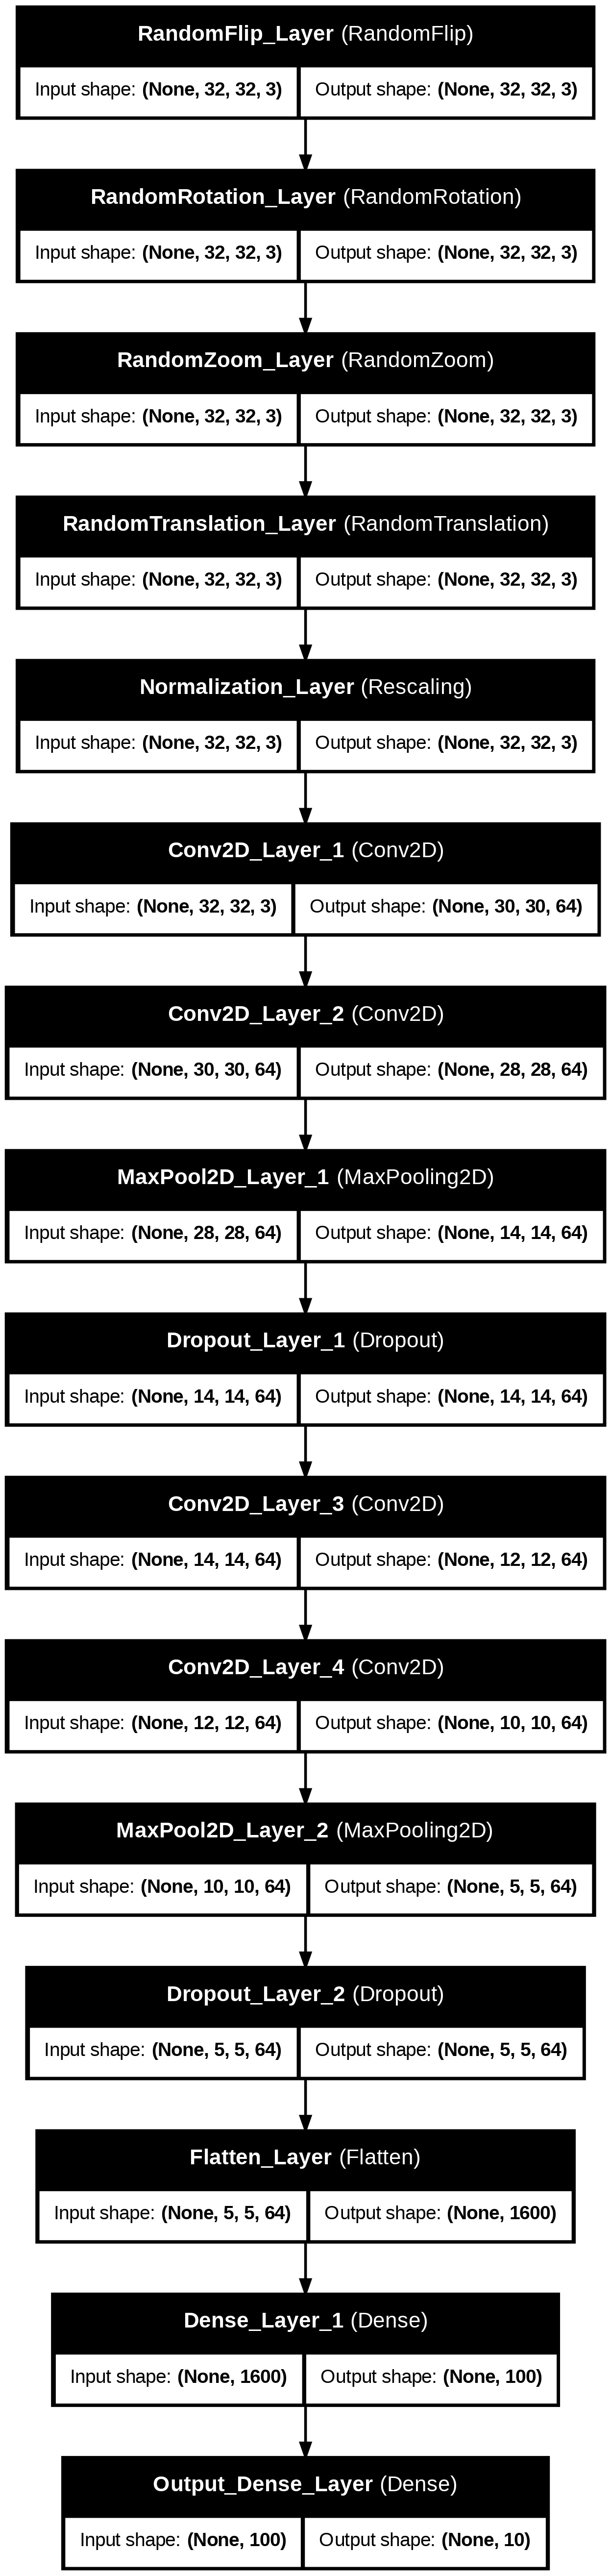

In [ ]:
plot_model(CNN_augmentation_model, show_shapes=True, show_layer_names=True)

### **CNN model with data augmentation training.**

In [30]:
CNN_augmentation_model_history = CNN_augmentation_model.fit(train_data,
                                                            epochs=Epochs,
                                                            validation_data=test_data,
                                                            validation_steps=int(0.20 * len(test_data)),
                                                            callbacks=[Model_CheckPoint, Early_Stopping, Reduce_Learningrate])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.2937 - loss: 1.9030 - val_accuracy: 0.4839 - val_loss: 1.4091 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4559 - loss: 1.4993 - val_accuracy: 0.5237 - val_loss: 1.3605 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5058 - loss: 1.3670 - val_accuracy: 0.5474 - val_loss: 1.2797 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5346 - loss: 1.2968 - val_accuracy: 0.5832 - val_loss: 1.2044 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5541 - loss: 1.2537 - val_accuracy: 0.5917 - val_loss: 1.1897 - learning_rate: 0.0010


### **plot loss and accuracy curves.**

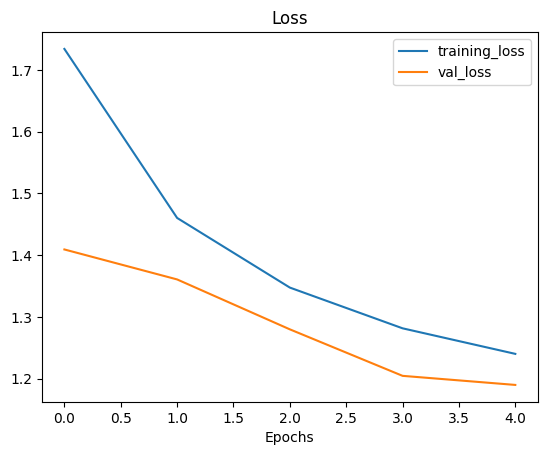

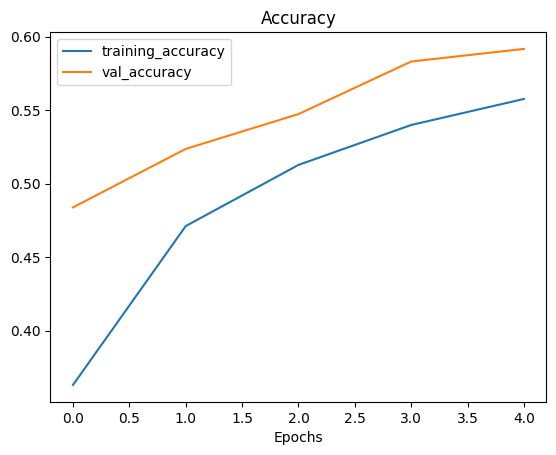

In [31]:
plot_loss_curves(CNN_augmentation_model_history)

### **Perform prediction and evaluation of our model.**

In [32]:
Prediction_augmentation = CNN_augmentation_model.predict(test_data)
Loss_augm, Accuracy_augm = CNN_augmentation_model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4852 - loss: 1.4108


In [33]:
print(f"Model loss on test set: {(Loss_augm):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_augm*100):.0f}%")

Model loss on test set: 1.42%
Model accuracy on test set: 48%


### **Compare predicted values to actual values.**

In [34]:
predicted_classes_augm = np.argmax(Prediction_augmentation, axis=1)
predicted_classes_augm

array([3, 1, 6, ..., 8, 6, 2])

In [35]:
result_augm = predicted_classes_augm == label
num_true_aumg = 0
num_false_aumg = 0
for i in result_augm:
  if i == True:
    num_true_aumg += 1
  else:
    num_false_aumg += 1

In [36]:
print(f"Number of total label {len(label)}")
print(f"Number of true predictions: {num_true_aumg}")
print(f"Number of false predictions: {num_false_aumg}")

Number of total label 10000
Number of true predictions: 4793
Number of false predictions: 5207


# **Fine tuning**

### **Number of layers, number of neurons in each layer and Dropout rate.**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = tf.keras.models.Sequential()

    # Input layer
    model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3)))  # Adjust input shape as needed

    # Define the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=3, max_value=6, step=1)  # Limit max number of layers

    for i in range(num_conv_layers):
        model.add(Conv2D(filters=hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice(f'kernel_size_{i}', values=[3, 5]),
                         activation=hp.Choice(f'conv_activation_function_{i}', values=['relu', 'tanh', 'sigmoid']),
                         padding='same'))  # Use 'same' padding to prevent shrinking too much


        if model.output_shape[1] >= 2 and model.output_shape[2] >= 2:
            model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())

    # Define the number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=4, step=1)

    for i in range(num_dense_layers):
        model.add(Dense(units=hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64),
                        activation=hp.Choice(f'dense_activation_function_{i}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(units=10, activation='softmax'))  # Adjust units based on number of classes

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5,
                                                                            max_value=1e-1, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Instantiate the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=10,
    directory='my_dir',
    project_name='cnn_tuning'
)

# Run the tuner search
tuner.search(train_data, validation_data=(test_data), validation_steps=int(0.20 * len(test_data)), epochs=10)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Number of Convolutional Layers: {best_hyperparameters.get('num_conv_layers')}")
for i in range(best_hyperparameters.get('num_conv_layers')):
    print(f"Best Number of Filters in Conv Layer {i + 1}: {best_hyperparameters.get(f'filters_{i}')}")
    print(f"Best Kernel Size in Conv Layer {i + 1}: {best_hyperparameters.get(f'kernel_size_{i}')}")
    print(f"Best Activation Function in Conv Layer {i + 1}: {best_hyperparameters.get(f'conv_activation_function_{i}')}")
    print(f"Best Padding in Conv Layer {i + 1}: 'same'")  # Padding is fixed to 'same'

print(f"Best Number of Dense Layers: {best_hyperparameters.get('num_dense_layers')}")
for i in range(best_hyperparameters.get('num_dense_layers')):
    print(f"Best Number of Neurons in Dense Layer {i + 1}: {best_hyperparameters.get(f'dense_units_{i}')}")
    print(f"Best Activation Function in Dense Layer {i + 1}: {best_hyperparameters.get(f'dense_activation_function_{i}')}")
    print(f"Best Dropout Rate after Dense Layer {i + 1}: {best_hyperparameters.get(f'dropout_{i}')}")

# Print learning rate
print(f"Best Learning Rate: {best_hyperparameters.get('learning_rate')}")

Trial 20 Complete [00h 03m 07s]
val_loss: 1.8589692115783691

Best val_loss So Far: 0.8879669904708862
Total elapsed time: 00h 26m 08s
Best Number of Convolutional Layers: 3
Best Number of Filters in Conv Layer 1: 32
Best Kernel Size in Conv Layer 1: 5
Best Activation Function in Conv Layer 1: tanh
Best Padding in Conv Layer 1: 'same'
Best Number of Filters in Conv Layer 2: 128
Best Kernel Size in Conv Layer 2: 5
Best Activation Function in Conv Layer 2: relu
Best Padding in Conv Layer 2: 'same'
Best Number of Filters in Conv Layer 3: 96
Best Kernel Size in Conv Layer 3: 3
Best Activation Function in Conv Layer 3: relu
Best Padding in Conv Layer 3: 'same'
Best Number of Dense Layers: 3
Best Number of Neurons in Dense Layer 1: 192
Best Activation Function in Dense Layer 1: relu
Best Dropout Rate after Dense Layer 1: 0.1
Best Number of Neurons in Dense Layer 2: 128
Best Activation Function in Dense Layer 2: tanh
Best Dropout Rate after Dense Layer 2: 0.5
Best Number of Neurons in Dense L

### **Run this cell to remove the fine tuning.**

In [ ]:
shutil.rmtree('/content/my_dir/cnn_tuning', ignore_errors=True)

**Rebuild the model after fine-tuning the number of layers, the number of neurons in each layer, and the dropout rate.**

# **Build the CNN_tuning.**

In [37]:
CNN_model_tuning = tf.keras.Sequential()
CNN_model_tuning.add(tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 3), name = 'Normalization_Layer'))
CNN_model_tuning.add(tf.keras.layers.Conv2D(32, (5, 5), activation='tanh', padding='same', name = 'Conv2D_Layer_1'))
CNN_model_tuning.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_1'))
CNN_model_tuning.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same', name = 'Conv2D_Layer_2'))
CNN_model_tuning.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_2'))
CNN_model_tuning.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same', name = 'Conv2D_Layer_3'))
CNN_model_tuning.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_3'))
CNN_model_tuning.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
CNN_model_tuning.add(tf.keras.layers.Dense(192, activation='relu', name='Dense_Layer_1'))
CNN_model_tuning.add(tf.keras.layers.Dropout(0.1, name='Dropout_Layer_1'))
CNN_model_tuning.add(tf.keras.layers.Dense(128, activation='tanh', name='Dense_Layer_2'))
CNN_model_tuning.add(tf.keras.layers.Dropout(0.5, name='Dropout_Layer_2'))
CNN_model_tuning.add(tf.keras.layers.Dense(128, activation='relu', name='Dense_Layer_3'))
CNN_model_tuning.add(tf.keras.layers.Dropout(0.1, name='Dropout_Layer_3'))
CNN_model_tuning.add(tf.keras.layers.Dense(10, activation='softmax', name='Dense_output_Layer'))

### **Compiling a CNN model.**

In [38]:
CNN_model_tuning.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=6.471942464110796e-05),
                         metrics=['accuracy'])

### **CNN model tuning summary.**

In [39]:
CNN_model_tuning.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Normalization_Layer (Rescaling)      │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_1 (Conv2D)              │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_1 (MaxPooling2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_2 (Conv2D)              │ (None, 16, 16, 128)         │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_2 (MaxPooling2D)     │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_3 (Conv2D)              │ (None, 8, 8, 96)            │         110,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_3 (MaxPooling2D)     │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_1 (Dense)                │ (None, 192)                 │         295,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_output_Layer (Dense)           │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,258 (2.11 MB)

 Trainable params: 553,258 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

### **Plot model.**

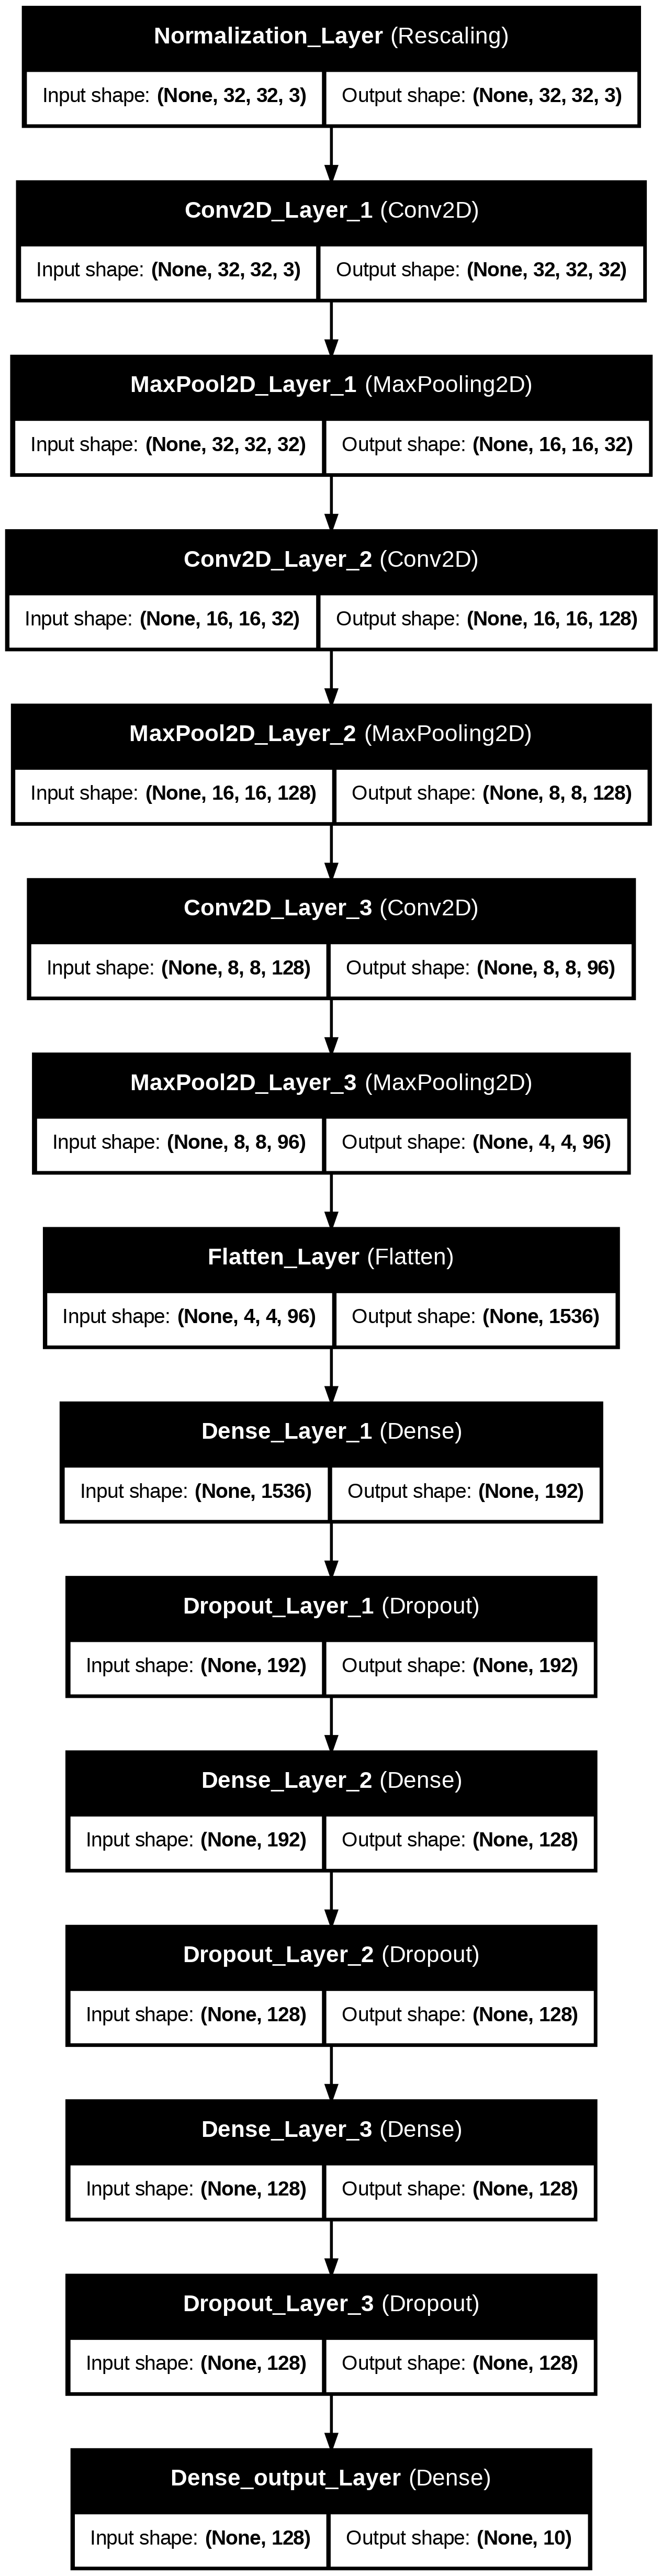

In [ ]:
plot_model(CNN_model_tuning, show_shapes=True, show_layer_names=True)

### **CNN model tuning training.**

In [40]:
CNN_model_tuning_history = CNN_model_tuning.fit(train_data,
                                                 epochs=Epochs,
                                                 validation_data=test_data,
                                                 validation_steps=int(0.20 * len(test_data)))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.2280 - loss: 2.0548 - val_accuracy: 0.4284 - val_loss: 1.5354
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4205 - loss: 1.5729 - val_accuracy: 0.4940 - val_loss: 1.3571
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4838 - loss: 1.4222 - val_accuracy: 0.5580 - val_loss: 1.2193
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5342 - loss: 1.2955 - val_accuracy: 0.5781 - val_loss: 1.1861
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5716 - loss: 1.1979 - val_accuracy: 0.5902 - val_loss: 1.0914
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6034 - loss: 1.1125 - val_accuracy: 0.5625 - val_loss: 1.0775
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6253 - loss: 1.0440 - val_accuracy: 0.6522 - val_loss: 0.9564
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6528 - loss: 0.979

### **Plot loss and accuracy curves.**

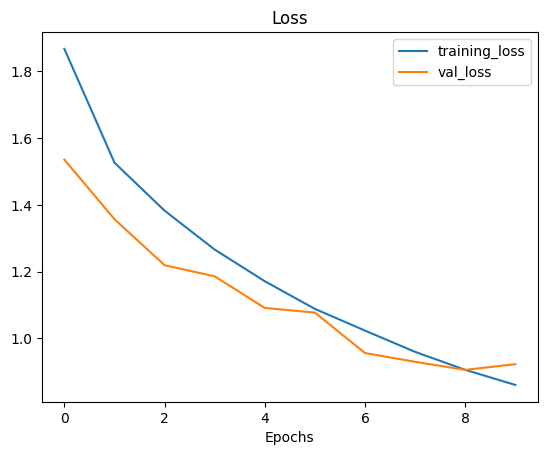

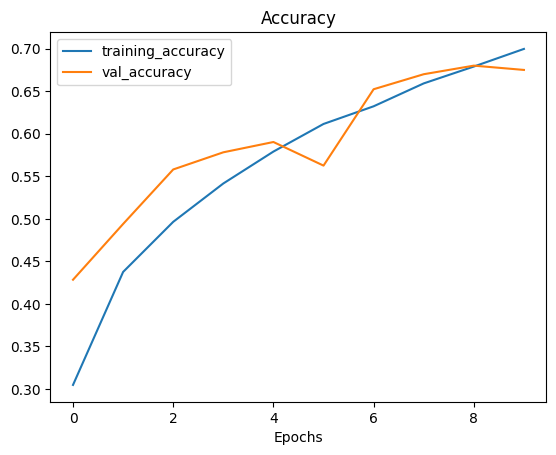

In [41]:
plot_loss_curves(CNN_model_tuning_history)

### **Perform prediction and evaluation of our model.**

In [42]:
Prediction_tuning = CNN_model_tuning.predict(test_data)
Loss_tuning, Accuracy_tuning = CNN_model_tuning.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6959 - loss: 0.8701


In [43]:
print(f"Model loss on test set: {(Loss_tuning):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_tuning*100):.0f}%")

Model loss on test set: 0.88%
Model accuracy on test set: 69%


### **Compare prediction values to actual values.**

In [44]:
predicted_classes_tuning = np.argmax(Prediction_tuning, axis=1)
predicted_classes_tuning

array([5, 0, 6, ..., 8, 6, 0])

In [45]:
result_tuning = predicted_classes_tuning == label
num_true_tuning = 0
num_false_tuning = 0
for i in result_tuning:
  if i == True:
    num_true_tuning += 1
  else:
    num_false_tuning += 1

In [46]:
print(f"Number of total label {len(label)}")
print(f"Number of true predictions: {num_true_tuning}")
print(f"Number of false predictions: {num_false_tuning}")

Number of total label 10000
Number of true predictions: 6916
Number of false predictions: 3084


# **Rebuild the CNN_tuning model with data augmentation layers.**

In [47]:
CNN_model_tuning_aug = tf.keras.Sequential()
CNN_model_tuning_aug.add(tf.keras.layers.RandomFlip("horizontal", input_shape=(32, 32, 3), name='RandomFlip_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.RandomRotation(0.1, name='RandomRotation_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.RandomZoom(0.2, name='RandomZoom_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.RandomTranslation(0.1, 0.1, name='RandomTranslation_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.Rescaling(1./255, name = 'Normalization_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.Conv2D(32, (5, 5), activation='tanh', padding='same', name = 'Conv2D_Layer_1'))
CNN_model_tuning_aug.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_1'))
CNN_model_tuning_aug.add(tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same', name = 'Conv2D_Layer_2'))
CNN_model_tuning_aug.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_2'))
CNN_model_tuning_aug.add(tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same', name = 'Conv2D_Layer_3'))
CNN_model_tuning_aug.add(tf.keras.layers.MaxPooling2D((2, 2), name='MaxPool2D_Layer_3'))
CNN_model_tuning_aug.add(tf.keras.layers.Flatten(name='Flatten_Layer'))
CNN_model_tuning_aug.add(tf.keras.layers.Dense(192, activation='relu', name='Dense_Layer_1'))
CNN_model_tuning_aug.add(tf.keras.layers.Dropout(0.1, name='Dropout_Layer_1'))
CNN_model_tuning_aug.add(tf.keras.layers.Dense(128, activation='tanh', name='Dense_Layer_2'))
CNN_model_tuning_aug.add(tf.keras.layers.Dropout(0.5, name='Dropout_Layer_2'))
CNN_model_tuning_aug.add(tf.keras.layers.Dense(128, activation='relu', name='Dense_Layer_3'))
CNN_model_tuning_aug.add(tf.keras.layers.Dropout(0.1, name='Dropout_Layer_3'))
CNN_model_tuning_aug.add(tf.keras.layers.Dense(10, activation='softmax', name='Dense_output_Layer'))

### **Compiling a model.**

In [48]:
CNN_model_tuning_aug.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                             optimizer=tf.keras.optimizers.Adam(learning_rate=6.471942464110796e-05),
                             metrics=['accuracy'])

### **Model summary.**

In [49]:
CNN_model_tuning_aug.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ RandomFlip_Layer (RandomFlip)        │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomRotation_Layer                 │ (None, 32, 32, 3)           │               0 │
│ (RandomRotation)                     │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomZoom_Layer (RandomZoom)        │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ RandomTranslation_Layer              │ (None, 32, 32, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalization_Layer (Rescaling)      │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_1 (Conv2D)              │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_1 (MaxPooling2D)     │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_2 (Conv2D)              │ (None, 16, 16, 128)         │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_2 (MaxPooling2D)     │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_Layer_3 (Conv2D)              │ (None, 8, 8, 96)            │         110,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MaxPool2D_Layer_3 (MaxPooling2D)     │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten_Layer (Flatten)              │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_1 (Dense)                │ (None, 192)                 │         295,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_1 (Dropout)            │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_2 (Dense)                │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_2 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_Layer_3 (Dense)                │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Layer_3 (Dropout)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_output_Layer (Dense)           │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,258 (2.11 MB)

 Trainable params: 553,258 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

### **CNN model training.**

In [50]:
CNN_model_tuning_aug_history = CNN_model_tuning_aug.fit(train_data,
                                                            epochs=Epochs+10,
                                                            validation_data=test_data,
                                                            validation_steps=int(0.20 * len(test_data)))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.2118 - loss: 2.1121 - val_accuracy: 0.3604 - val_loss: 1.7620
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3629 - loss: 1.7434 - val_accuracy: 0.4370 - val_loss: 1.5142
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4089 - loss: 1.6217 - val_accuracy: 0.4128 - val_loss: 1.6686
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4415 - loss: 1.5437 - val_accuracy: 0.4889 - val_loss: 1.4431
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4657 - loss: 1.4787 - val_accuracy: 0.4909 - val_loss: 1.4374
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4824 - loss: 1.4294 - val_accuracy: 0.5250 - val_loss: 1.3448
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.5029 - loss: 1.3862 - val_accuracy: 0.5484 - val_loss: 1.2615
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5216 -

### **Plot loss and accuracy curves.**

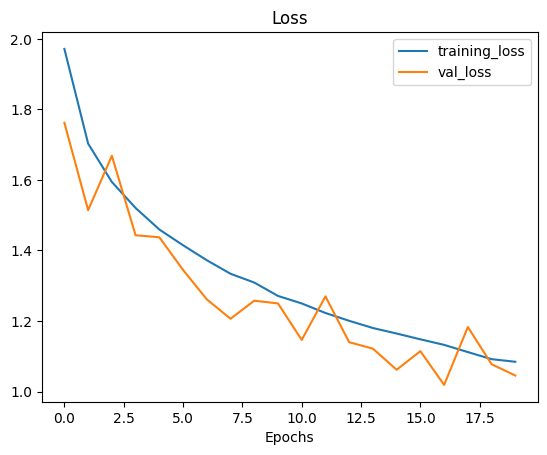

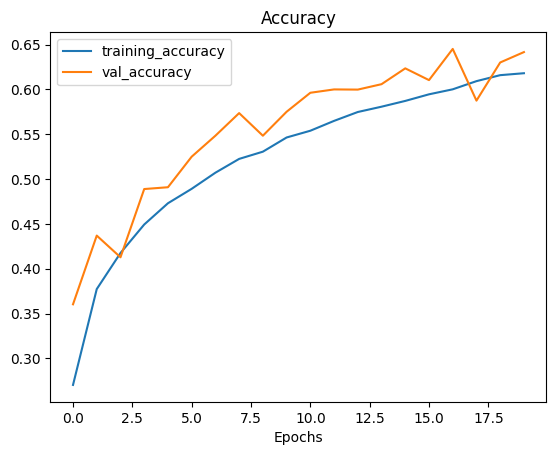

In [51]:
plot_loss_curves(CNN_model_tuning_aug_history)

### **Parform prediction and evaluation of out model.**

In [58]:
Prediction_tuning_aug = CNN_model_tuning_aug.predict(test_data)
Loss_tuning_aug, Accuracy_tuning_aug = CNN_model_tuning_aug.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6328 - loss: 1.0582


In [53]:
print(f"Model loss on test set: {(Loss_tuning_aug):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_tuning_aug*100):.0f}%")

Model loss on test set: 1.07%
Model accuracy on test set: 63%


### **Compare prediction values to actual values.**

In [59]:
predicted_classes_tuning_aug = np.argmax(Prediction_tuning_aug, axis=1)
predicted_classes_tuning_aug

array([7, 1, 6, ..., 8, 4, 0])

In [54]:
result_tuning_aug = predicted_classes_tuning == label
num_false_tuning_aug = 0
num_true_tuning_aug = 0
for i in result_tuning_aug:
  if i == True:
    num_true_tuning_aug += 1
  else:
    num_false_tuning_aug += 1

In [61]:
print(f"Number of total label {len(label)}")
print(f"Number of true predictions: {num_true_tuning_aug}")
print(f"Number of false predictions: {num_false_tuning_aug}")

Number of total label 10000
Number of true predictions: 6916
Number of false predictions: 3084


# **Create a dataset contain all result of prediction and compare to actual.**

In [72]:
Result_dataset = pd.DataFrame({'Actual': label,
                               'Predicted_tuning': predicted_classes_tuning,
                               'Predicted_augmentation': predicted_classes_augm,
                               'Predicted_CNN': predicted_classes,
                               'Predicted_tuning_aug': predicted_classes_tuning_aug,
                               'Actual to Predicted_tuning' : label == predicted_classes_tuning,
                               'Actual to Predicted_augmentation' : label == predicted_classes_augm,
                               'Actual to Predicted_CNN' : label == predicted_classes,
                               'Actual to Predicted_tuning_aug' : label == predicted_classes_tuning_aug})

### **Plot all final result.**

In [73]:
Result_Predicted_CNN = Result_dataset['Actual to Predicted_CNN'].value_counts()
Result_Predicted_tuning = Result_dataset['Actual to Predicted_tuning'].value_counts()
Result_Predicted_augmentation = Result_dataset['Actual to Predicted_augmentation'].value_counts()
Result_Predicted_tuning_aug = Result_dataset['Actual to Predicted_tuning_aug'].value_counts()

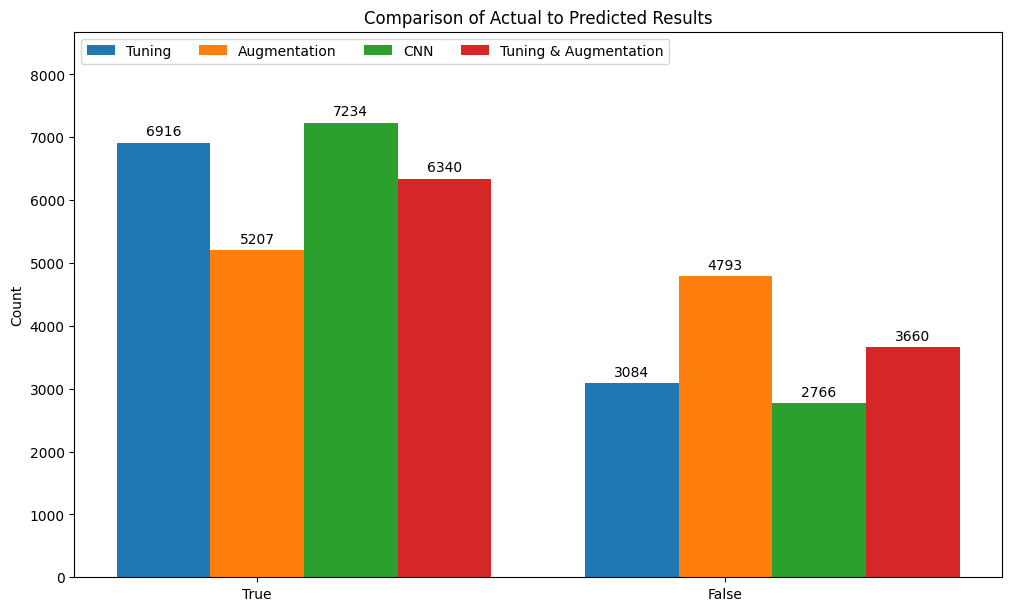

In [74]:
categories = Result_Predicted_tuning.index
values = {
    'Tuning': Result_Predicted_tuning.values,
    'Augmentation': Result_Predicted_augmentation.values,
    'CNN': Result_Predicted_CNN.values,
    'Tuning & Augmentation': Result_Predicted_tuning_aug.values,
}

x = np.arange(len(categories))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Count')
ax.set_title('Comparison of Actual to Predicted Results')
ax.set_xticks(x + width, categories)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max([max(val) for val in values.values()]) * 1.2)

plt.show()

# **Use pre-trained model to your dataset.**


### In this case i used ***EfficientNetB0***.

### **Download a pre-trained model, then remove the top and freeze the training.**

In [90]:
from tensorflow.keras.applications import EfficientNetB0
best_model = EfficientNetB0(include_top=False)
best_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### **Bulid the CNN model with pre-trained EfficientNetB0.**

In [91]:
CNN_model_pre_trained = tf.keras.Sequential()
CNN_model_pre_trained.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3)))
CNN_model_pre_trained.add(best_model)
CNN_model_pre_trained.add(tf.keras.layers.GlobalAveragePooling2D())
CNN_model_pre_trained.add(tf.keras.layers.Dense(128, activation='relu'))
CNN_model_pre_trained.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### **Compiling a model.**

In [92]:
CNN_model_pre_trained.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                              optimizer=tf.keras.optimizers.Adam(),
                              metrics=['accuracy'])

### **Model summary.**

In [93]:
CNN_model_pre_trained.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 1, 1, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### **Model training.**

In [94]:
CNN_model_pre_trained_history = CNN_model_pre_trained.fit(train_data,
                                                           epochs=Epochs,
                                                           validation_data=test_data,
                                                           validation_steps=int(0.20 * len(test_data)),
                                                           callbacks=[Model_CheckPoint, Early_Stopping, Reduce_Learningrate])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.4153 - loss: 1.6317 - val_accuracy: 0.5307 - val_loss: 1.3097 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5259 - loss: 1.3350 - val_accuracy: 0.5418 - val_loss: 1.2601 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5463 - loss: 1.2752 - val_accuracy: 0.5892 - val_loss: 1.2053 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5518 - loss: 1.2540 - val_accuracy: 0.5464 - val_loss: 1.2532 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.5592 - loss: 1.2246 - val_accuracy: 0.5655 - val_loss: 1.2447 - learning_rate: 0.0010


### **plot loss and accuracy curves.**

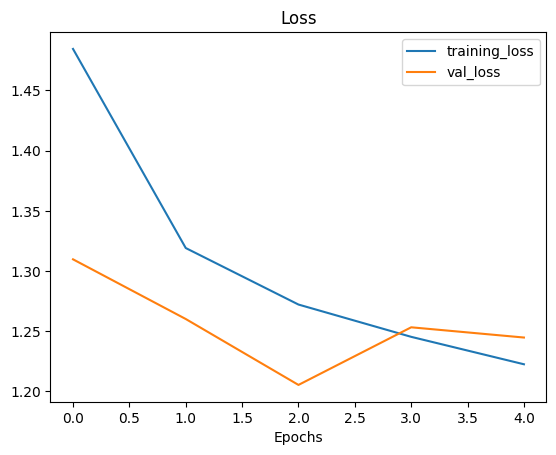

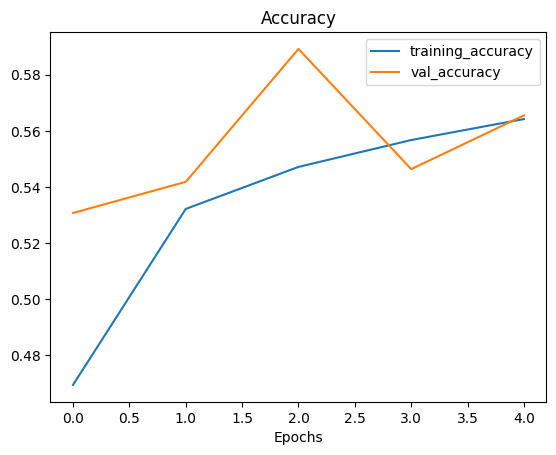

In [95]:
plot_loss_curves(CNN_model_pre_trained_history)

### **Preform prediction and evaluation of our model.**

In [96]:
Prediction_pre_trained = CNN_model_pre_trained.predict(test_data)
Loss_pre_trained, Accuracy_pre_trained = CNN_model_pre_trained.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5309 - loss: 1.3089


In [97]:
print(f"Model loss on test set: {(Loss_pre_trained):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_pre_trained*100):.0f}%")

Model loss on test set: 1.32%
Model accuracy on test set: 53%


# **Save the best two models.**

In [108]:
Best_CNN_model = CNN_model.save('Bast_CNN_model.h5')
Best_CNN_tuning = CNN_model_tuning.save('Best_CNN_tuning.keras')

# **Load models.**

In [110]:
Best_CNN_model = tf.keras.models.load_model('Bast_CNN_model.h5')
Best_CNN_tuning = tf.keras.models.load_model('Best_CNN_tuning.keras')

# **Evaluation after load.**

In [114]:
Loss_CNN, Accuracy_CNN = Best_CNN_model.evaluate(test_data)
Loss_CNN_tuning, Accuracy_CNN_tuning = Best_CNN_tuning.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7241 - loss: 0.7859
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6959 - loss: 0.8701


In [115]:
print(f"Model loss on test set: {(Loss_CNN):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_CNN*100):.0f}%")
print(f"Model loss on test set: {(Loss_CNN_tuning):.2f}%")
print(f"Model accuracy on test set: {(Accuracy_CNN_tuning*100):.0f}%")

Model loss on test set: 0.80%
Model accuracy on test set: 72%
Model loss on test set: 0.88%
Model accuracy on test set: 69%
